# Смерть Ленина в личных дневниках.
<br>
Данный проект выполнен на базе данных (mysql) ресурса "Прожито" (http://prozhito.org/) в рамках проектной деятельности "Мастерские"; проект выполнен Смирновой Александрой. "Прожито" - электронный архив личных дневников, который может быть использован для различных исторических исследований, а также в качестве корпуса; данный проект можно расценивать как демонстрацию этого.

#### Цель: 
Cравнить дневниковые записи, сделанные в день смерти Ленина, а также в последующие дни до похорон Ленина включительно.
#### Вопросы: 
- В какие дни + сколько люди писали о себе и о Ленине? в какие дни больше писали о Ленине? почему?
- ссылка на dump: 
https://www.dropbox.com/sh/8vfjjt8107sv9r3/AADOVR795MxFovpuGN9PT_JZa?dl=0


In [262]:
#загрузка дневниковых записей:
dw = csvtools.DumpWrapper(r'C:/Users/Lenovo/Desktop/конспекты 3 курс/Мастерская Прожито/dump')
notes = dw.notes()

In [263]:
#загрузка необходимых модулей и библиотек
import csvtools
from pymystem3 import Mystem 
import pymorphy2
m = Mystem()
from collections import Counter
import datetime
import time
import matplotlib.pyplot as plt

In [264]:
#функция, очищающая текст (от стоп-слов, знаков и пр.)
from stop_words import get_stop_words 
ru_stop = get_stop_words('ru')

def filter_word(w):
    w = w.strip('\n')
    if w == '':
        return False
    if not w[0].isalpha():
        return False
    if w in ru_stop:
        return False
    return True

Код ниже работает следующим образом: 
- из базы выкачиваютя тексты, написанные в определенный день (21-27 января 1924-го); 
- тексты преобразуются в массив; 
- по предложениям текст лемматизируется и "фильтруется"; 
- подсчитывается процентное содержание слов "Ленин", "ленинский", "Ильич" и "вождь" в текстах конкретного дня 
- подсчитывается примерный процент упоминания Ленина в этот день:

In [265]:
dates = [21, 22, 23, 24, 25, 26, 27]
percents = []
for date in dates:
    K = notes.searchDate((1924, 1, date))
    print('date: '+str(date)+'.01.1924')
    
    sentences = []
    for k in K:
        tex = k.text
        sentences.append(tex)
        
    lemmatext = []
    print('text imported')
    for sentence in sentences:
        lemmas = m.lemmatize(sentence)
        lemmatext.extend(lemmas)
    print('text lemmatized')
    lemmas = filter(filter_word, lemmatext)
    lemmas = list(lemmas)
    
    a = round((Counter(lemmas)['ленин']/len(lemmas)*100), 1)
    b = round((Counter(lemmas)['ленинский']/len(lemmas)*100), 1)
    d = round((Counter(lemmas)['ильич']/len(lemmas)*100), 1)
    c = round((Counter(lemmas)['вождь']/len(lemmas)*100), 1)
    s = round(a+b+c+d, 1)
    percents.append(s)
    print('statistics appended')
    time.sleep(2)

date: 21.01.1924
text imported
text lemmatized
statistics appended
date: 22.01.1924
text imported
text lemmatized
statistics appended
date: 23.01.1924
text imported
text lemmatized
statistics appended
date: 24.01.1924
text imported
text lemmatized
statistics appended
date: 25.01.1924
text imported
text lemmatized
statistics appended
date: 26.01.1924
text imported
text lemmatized
statistics appended
date: 27.01.1924
text imported
text lemmatized
statistics appended


#### Визуализация:

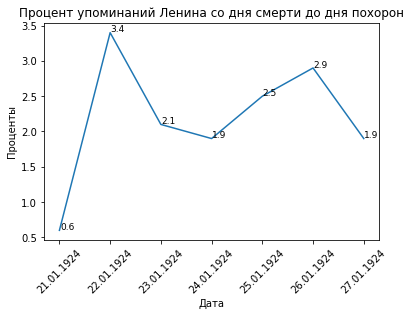

In [267]:
labels = [f'{d}.01.1924' for d in dates]

plt.plot(dates, percents)
plt.title('Процент упоминаний Ленина со дня смерти до дня похорон')
plt.ylabel('Проценты')
plt.xlabel('Дата')
plt.xticks(dates, labels, rotation=45)
for e in range(len(percents)):
    #plt.plot(dates[e], percents[e])
    plt.text(dates[e]+0.01, percents[e]+0.01, str(percents[e]), fontsize=9)
plt.show()

### Выводы и обсуждение
<br>
Ленин умер 21 января 1924. Его похороны (помещение в мавзолей) были 27 января. Пять дней проходило официальное прощание. В статистике рассматриваются дневники, написанные в период с 21 по 27 января включительно. 
<br>
<br>
На графике отображены проценты упоминаний Ленина относительно текстов разных дней (рассматривались слова: Ленин, ленинский, Ильич, вождь). Можно отметить интересные наблюдения:
<br>
<br>
 ~ наименьший процент упоминаний Ленина в этот период был в день его смерти. Это объяснимо: Ленин умер в 18:50 часов, новость дошла не до всех. 
<br>
 ~ наибольший процент упоминаний Ленина - как раз на следующий день после смерти, 22 января. В этот день было вынесено официальное заключение о причине смерти в протоколе вскрытия тела, новость дошла до людей окончательно, отчего имеет наибольший отклик в личных записях. 
<br>
<br>
Интересно посмотреть на характер записей в разные дни. В день смерти - чисто фактический, сообщение об известии. На следующий день кто-то пишет так же уведомительно, кто-то пишет об этом как "о слухе", но в основном записи с эмоциональной реакцией на случившееся. На третий день записи рознятся: кто-то только 23-го числа узнает о смерти (и так же эмоционально рефлексирует на этот счет), кто-то уже сходил к гробу. К 24-му числу новость уже окончательно разошлась, и в дневниках пишут про то, как новость о смерти распространена в газетах и разговорах. 25-го и 26-го января писали о Ленине мало (каждый день лишь по одной записи посвящено Ленину). 
<br>
<br>
Интересно, что в день похорон ожидается как раз самый эмоциональный отклик, потому что есть событие, напрямую наталкивающее на рефлексию. Но 27 января о Ленине писали не так много. (Зато, если посмотреть на записи - часто!)

### Перспективы и планы.
Это исследование можно считать отправной точкой для создания более широкого исследования. В частности, относительно этого проекта есть следующие планы: 
<br>

1) найти подходящий метод и внедрить лемматизацию для украинского языка. 
<br>
Дело в том, что в нынешнем проекте часто появляются дневники украинца, пишущего на украинском языке, а этот язык не берет Mystem, отчего украинские тексты не лемматизируются и из-за этого не включаются в статистику должным образом. 
<br>

2) смотреть не "как много" упоминался Ленин, а "как часто" (см. проценты дней 25.01 и 26.01 - в оба дня частота упоминания равнялась "упоминание в одном дневнике", а процент такой же, как и в день похорон, когда бОльшее количество людей написали об этом. => как вариант, использование topic modeling
<br>

3) была идея проверить теорию, что после своей смерти Ленин из человека "превратился" в идею. Для этого предполагалось проверить все упоминания о Ленине с ноября 1922 года по июнь 1924-го - посмотреть коллокации (2- и 3- граммы). Это интересная идея, но она имеет некоторые сложности в реализации (в частности, выкачка столь большого объема данных требует оптимизации алгоритма или платформы для запуска кода).

### Ниже приведены разборы записей по дням: можно подробнее изучить записи конкретного дня: прочитать сами записи; посмотреть на их количество, увидеть их лемматизированные варианты.

### День смерти Ленина 

In [68]:
L = notes.searchDate((1924, 1, 21))

In [62]:
print("Записей в этот день:", len(L))

Записей в этот день: 7


In [42]:
# дневниковые записи по отдельности
for l in L:
    print(l.text, "\n\n--\n\n")

Умер В.И.Ленин в 6 часов вечера. 

--


В 10.30 репетиция с Гусенсом, который сопровождал очень хорошо, приняв во внимание, что мы сыгрывались и он раньше не слыхал этого Концерта (мой Первый, очень жаль, что не Второй, но его еле выучу к весне, к Кусевицкому).    
Ходил на Victoria Station узнавать про поезда. Кое-какие идут и станция, несмотря на всеобщую забастовку, не мертва. Говорят, завтра мой поезд пойдёт. Заходил в лондонское отделение Aeolian Co. Попал удачно, так как они только что получили предписание из Нью-Йорка заключить со мною новый контракт наигрывания, но не на пять лет, а на пять сезонов, т.е. на пять моих будущих приездов в Нью-Йорк, по три рулона вместо прежних пяти. Ясно, что мои фонды в Америке низки и мне сбивают количество, а так как от предлагаемого контракта я не могу извлекать пользы, пока я в Европе, я просил отложить переговоры до моего следующего приезда в Нью-Йорк. Пока же воспользуюсь случаем, чтобы сообщить, что я переложил «Шехеразаду» (хотя я её не к

In [128]:
sentences = []
for l in L:
    tex = l.text
    sentences.append(tex)

In [135]:
lemmatext = []

for sentence in sentences:
    lemmas = m.lemmatize(sentence)
    lemmatext.extend(lemmas)

In [147]:
lemmas = filter(filter_word, lemmatext)
lemmas = list(lemmas)

In [169]:
print(lemmas) #лемматизированный текст без стоп-слов

['умирать', 'ленин', 'час', 'вечер', 'репетиция', 'гусенс', 'сопровождать', 'принимать', 'внимание', 'сыгрываться', 'слыхать', 'концерт', 'жаль', 'еле', 'выучивать', 'весна', 'кусевицкий', 'ходить', 'Victoria', 'Station', 'узнавать', 'поезд', 'кое-какой', 'идти', 'станция', 'несмотря', 'всеобщий', 'забастовка', 'мертвый', 'говорить', 'завтра', 'поезд', 'пойти', 'заходить', 'лондонский', 'отделение', 'Aeolian', 'Co', 'попадать', 'удачно', 'получать', 'предписание', 'нью-йорк', 'заключать', 'новый', 'контракт', 'наигрывание', 'сезон', 'будущий', 'приезд', 'нью-йорк', 'рулон', 'вместо', 'прежний', 'ясно', 'фонд', 'америка', 'низкий', 'сбивать', 'количество', 'предлагать', 'контракт', 'извлекать', 'польза', 'европа', 'просить', 'откладывать', 'переговоры', 'следующий', 'приезд', 'нью-йорк', 'воспользоваться', 'случай', 'сообщать', 'перелагать', 'шехеразада', 'кончать', 'попросить', 'аванс', 'неиспользованный', 'последний', 'предыдущий', 'контракт', 'Mead', 'директор', 'лондонский', 'вероят

In [197]:
#Counter(lemmas).most_common(100)
a = round((Counter(lemmas)['ленин']/len(lemmas)*100), 1)
b = round((Counter(lemmas)['ленинский']/len(lemmas)*100), 1)
d = round((Counter(lemmas)['ильич']/len(lemmas)*100), 1)
c = round((Counter(lemmas)['вождь']/len(lemmas)*100), 1)

In [225]:
print("Употребление слова 'Ленин' в этот день:", a, "%")
print("Употребление слова 'ленинский' в этот день:", b, "%")
print("Употребление слова 'Ильич' в этот день:", d, "%")
print("Употребление слова 'вождь' в этот день:", c, "%")
print("Примерный процент упоминания Ленина в этот день:", a+b+d+c, "%")

Употребление слова 'Ленин' в этот день: 0.6 %
Употребление слова 'ленинский' в этот день: 0.0 %
Употребление слова 'Ильич' в этот день: 0.0 %
Употребление слова 'вождь' в этот день: 0.0 %
Примерный процент упоминания Ленина в этот день: 0.6 %


#### День 1 после смерти

In [80]:
L1 = notes.searchDate((1924, 1, 22))

In [81]:
print("Записей в этот день:", len(L1))

Записей в этот день: 10


In [85]:
# дневниковые записи по отдельности
for l in L1:
    print(l.text, "\n\n--\n\n")

Сейчас только что (пять с половиной часов вечера) Семка сообщил, что Ленин скончался. Об этом, по его словам, есть официальное сообщение. 

--


Вторник. «9 января». Погода сырая. Мороз порядочный. Ходил на вокзальную площадь смотреть инсценировку расстрела рабочих в Петербурге... Старую армию изображали артиллерийские, кавалерийские и пешие красноармейские части. Они нашили себе на шапки старорежимные значки, на плечах были погоны. Красные значки на рукавах завязали тряпками. Рабочих представляли рабочие депо ЕЖД и паровозные мастерские. Вокзал изображал дворец.    
Когда рабочие появились (с иконами, хоругвями), их встретили ружейными залпами и из орудий. Рабочие падали на снег. После этого была произнесена небольшая речь. Таня и Бина писали доклад. 

--


Встал рано и бегал за чеком и его разменом. Купил новую шляпу у Locks. По случаю забастовки не было известно, пойдёт ли поезд. Но поезд на континент пошёл и в два часа я был уже во Франции, очень довольный, что покинул дорогой, заб

In [92]:
sentences1 = []
for i in L1:
    tex1 = i.text
    sentences1.append(tex1)

In [93]:
lemmatext1 = []
for sentence in sentences1:
    lemmas = m.lemmatize(sentence)
    lemmatext1.extend(lemmas)

In [180]:
lemmas1 = filter(filter_word, lemmatext1)
lemmas1 = list(lemmas1)
print(lemmas1) #лемматизированный текст без стоп-слов

['половина', 'час', 'вечер', 'семка', 'сообщать', 'ленин', 'скончаться', 'слово', 'официальный', 'сообщение', 'вторник', 'январь', 'погода', 'сырой', 'мороз', 'порядочный', 'ходить', 'вокзальный', 'площадь', 'смотреть', 'инсценировка', 'расстрел', 'рабочий', 'петербург', 'старый', 'армия', 'изображать', 'артиллерийский', 'кавалерийский', 'пеший', 'красноармейский', 'часть', 'нашивать', 'шапка', 'старорежимный', 'значок', 'плечо', 'погон', 'красный', 'значок', 'рукав', 'завязывать', 'тряпка', 'рабочий', 'представлять', 'рабочий', 'депо', 'ежды', 'паровозный', 'мастерская', 'вокзал', 'изображать', 'дворец', 'рабочий', 'появляться', 'икона', 'хоругвь', 'встречать', 'ружейный', 'залп', 'орудие', 'рабочий', 'падать', 'снег', 'произносить', 'небольшой', 'речь', 'таня', 'бин', 'писать', 'доклад', 'вставать', 'бегать', 'чек', 'размен', 'купить', 'новый', 'шляпа', 'Locks', 'случай', 'забастовка', 'известно', 'пойти', 'поезд', 'поезд', 'континент', 'пойти', 'час', 'франция', 'довольный', 'покида

In [195]:
#Counter(lemmas1).most_common(100)
a1 = round((Counter(lemmas1)['ленин']/len(lemmas1)*100), 1)
b1 = round((Counter(lemmas1)['ленинский']/len(lemmas1)*100), 1)
d1 = round((Counter(lemmas1)['ильич']/len(lemmas1)*100), 1)
c1 = round((Counter(lemmas1)['вождь']/len(lemmas1)*100), 1)

In [226]:
print("Употребление слова 'Ленин' в этот день:", a1, "%")
print("Употребление слова 'ленинский' в этот день:", b1, "%")
print("Употребление слова 'Ильич' в этот день:", d1, "%")
print("Употребление слова 'вождь' в этот день:", c1, "%")
print("Примерный процент упоминания Ленина в этот день:", a1+b1+d1+c1, "%")

Употребление слова 'Ленин' в этот день: 2.6 %
Употребление слова 'ленинский' в этот день: 0.0 %
Употребление слова 'Ильич' в этот день: 0.5 %
Употребление слова 'вождь' в этот день: 0.3 %
Примерный процент упоминания Ленина в этот день: 3.4 %


#### День 2 после смерти

In [86]:
L2 = notes.searchDate((1924, 1, 23))

In [87]:
print("Записей в этот день:", len(L2))

Записей в этот день: 12


In [88]:
# дневниковые записи по отдельности
for l in L2:
    print(l.text, "\n\n--\n\n")

#ЛЕНИН В ГРОБУ  
Я шел по красным коврам Дома союзов — тихо, в очереди, затаив дыханье, думал:  
«Сейчас увижу лицо твое, Учитель, — и прощай. Навеки. Больше ни этого знакомого лба, ни сощуренных глаз, ни голой, круглой головы — ничего не увижу».  
Мы все ближе, ближе…  
Все ярче огни — электричеством залит зал, заставленный цветами. Посреди зала, на красном — в красном — лежит Ленин: лицо бело как бумага, спокойно, на нем ни морщин, ни страданья — оно далеко от тревог, оно напоминает спокойствием своим лицо спящего младенца. Он, говорят, перед смертью не страдал — умер тихо, без корч, без судорог, без мук. Эта тихая смерть положила печать спокойствия и на дорогое лицо. Как оно прекрасно, это лицо! Я знаю, что еще прекрасней оно потому, что — любимое, самое любимое, самое дорогое. Я видел Ильича последний раз года два-три назад. Теперь, в гробу, он бледней, худей — осунулся вдвое, только череп — крутой и гладкий, — как тогда, одинаков. Вот вижу со ступенек все лицо, с закрытыми глазами

In [95]:
sentences2 = []
for i in L2:
    tex2 = i.text
    sentences2.append(tex2)

In [96]:
lemmatext2 = []
for sentence in sentences2:
    lemmas = m.lemmatize(sentence)
    lemmatext2.extend(lemmas)

In [192]:
lemmas2 = filter(filter_word, lemmatext2)
lemmas2 = list(lemmas2)
print(lemmas2) #лемматизированный текст без стоп-слов

['ленин', 'гроб', 'идти', 'красный', 'ковер', 'дом', 'союз', 'тихо', 'очередь', 'затаивать', 'дыхание', 'думать', 'увидеть', 'лицо', 'учитель', 'прощай', 'навеки', 'знакомый', 'лоб', 'сощуривать', 'глаз', 'голый', 'круглый', 'голова', 'ничто', 'увидеть', 'яркий', 'огонь', 'электричество', 'заливать', 'зал', 'заставлять', 'цветок', 'зал', 'красный', 'красный', 'лежать', 'ленин', 'лицо', 'белый', 'бумага', 'спокойно', 'морщина', 'страдание', 'тревога', 'напоминать', 'спокойствие', 'свой', 'лицо', 'спящий', 'младенец', 'говорить', 'смерть', 'страдать', 'умирать', 'тихо', 'корча', 'судорога', 'мука', 'тихий', 'смерть', 'полагать', 'печать', 'спокойствие', 'дорогой', 'лицо', 'лицо', 'знать', 'любимый', 'самый', 'любимый', 'самый', 'дорогой', 'видеть', 'ильич', 'последний', 'гроб', 'бледный', 'худой', 'осунуться', 'вдвое', 'череп', 'крутой', 'гладкий', 'одинаковый', 'видеть', 'ступенька', 'лицо', 'закрывать', 'глаз', 'впалый', 'щека', 'чуточный', 'бородка', 'бровь', 'словно', 'приклеивать', 

In [204]:
#Counter(lemmas2).most_common(100)
a2 = round((Counter(lemmas2)['ленин']/len(lemmas2)*100), 1)
b2 = round((Counter(lemmas2)['ленинский']/len(lemmas2)*100), 1)
d2 = round((Counter(lemmas2)['ильич']/len(lemmas2)*100), 1)
c2 = round((Counter(lemmas2)['вождь']/len(lemmas2)*100), 1)

In [227]:
print("Употребление слова 'Ленин' в этот день:", a2, "%")
print("Употребление слова 'ленинский' в этот день:", b2, "%")
print("Употребление слова 'Ильич' в этот день:", d2, "%")
print("Употребление слова 'вождь' в этот день:", c2, "%")
print("Примерный процент упоминания Ленина в этот день:", a2+b2+d2+c2, "%")

Употребление слова 'Ленин' в этот день: 1.3 %
Употребление слова 'ленинский' в этот день: 0.0 %
Употребление слова 'Ильич' в этот день: 0.5 %
Употребление слова 'вождь' в этот день: 0.3 %
Примерный процент упоминания Ленина в этот день: 2.1 %


#### День 3 после смерти

In [98]:
L3 = notes.searchDate((1924, 1, 24))

In [99]:
print("Записей в этот день:", len(L3))

Записей в этот день: 8


In [100]:
# дневниковые записи по отдельности
for l in L3:
    print(l.text, "\n\n--\n\n")

Четверг. Мороз и пурга. Нанесло снега. Мороз в 15°. Мама испекла яблочное печенье. Сегодня начал читать Альфонса Додэ «Необыч. приключения Тартарена из Тараскона». Сегодня так раскалилась плита, что случилось несколько несчастий: сгорела кочерга, отскочила эмаль у нашего чайника и тлела юбка H. Р. 

--


Учил каденцию. Ездил в русское консульство за паспортом для Пташки, а то у неё всё ещё девичий испанский. Всякие затруднения, но у консула дочь консерваторка, и узнав, что «тот Прокофьев», он обещал устроить.    
Вечером Фру-Фру рассказывала про дни Временного правительства и про Керенского, который женился на её кузине. Ругала его за то, что он управление государством путал с романтическими похождениями. 

--


Все, что пело, звучало, сияло, переливалось сверкающей радугой в моей жизни — потускнело, стало беззвучным, приостановилось и затихло.    
Ритм жизни, текучесть, радость. Неужели все это — что было же и до Иоанна — все это собралось, как в фокусе кристалла лучи света, в имени е

In [101]:
sentences3 = []
for i in L3:
    tex3 = i.text
    sentences3.append(tex3)

In [102]:
lemmatext3 = []
for sentence in sentences3:
    lemmas = m.lemmatize(sentence)
    lemmatext3.extend(lemmas)

In [201]:
lemmas3 = filter(filter_word, lemmatext3)
lemmas3 = list(lemmas3)
print(lemmas3) #лемматизированный текст без стоп-слов

['четверг', 'мороз', 'пурга', 'наносить', 'снег', 'мороз', 'мама', 'испечь', 'яблочный', 'печение', 'начинать', 'читать', 'альфонса', 'додэ', 'необыч', 'приключение', 'тартарен', 'тараскон', 'раскаляться', 'плита', 'случаться', 'несчастие', 'сгорать', 'кочерга', 'отскочить', 'эмаль', 'чайник', 'тлеть', 'юбка', 'H', 'р', 'учить', 'каденция', 'ездить', 'русский', 'консульство', 'паспорт', 'пташка', 'девичий', 'испанский', 'всякий', 'затруднение', 'консул', 'дочь', 'консерваторка', 'узнавать', 'прокофьев', 'обещать', 'устраивать', 'вечер', 'фру', 'фру', 'рассказывать', 'временный', 'правительство', 'керенский', 'жениться', 'кузина', 'ругать', 'управление', 'государство', 'путать', 'романтический', 'похождение', 'петь', 'звучать', 'сиять', 'переливаться', 'сверкать', 'радуга', 'потускнеть', 'становиться', 'беззвучный', 'приостанавливаться', 'затихать', 'ритм', 'текучесть', 'радость', 'неужели', 'иоанн', 'собираться', 'фокус', 'кристалл', 'луч', 'свет', 'воля', 'неволей', 'уклоняться', 'фок

In [211]:
#Counter(lemmas3).most_common(100)
a3 = round((Counter(lemmas3)['ленин']/len(lemmas3)*100), 1)
b3 = round((Counter(lemmas3)['ленинский']/len(lemmas3)*100), 1)
d3 = round((Counter(lemmas3)['ильич']/len(lemmas3)*100), 1)
c3 = round((Counter(lemmas3)['вождь']/len(lemmas3)*100), 1)

In [228]:
print("Употребление слова 'Ленин' в этот день:", a3, "%")
print("Употребление слова 'ленинский' в этот день:", b3, "%")
print("Употребление слова 'Ильич' в этот день:", d3, "%")
print("Употребление слова 'вождь' в этот день:", c3, "%")
print("Примерный процент упоминания Ленина в этот день:", a3+b3+d3+c3, "%")

Употребление слова 'Ленин' в этот день: 1.5 %
Употребление слова 'ленинский' в этот день: 0.2 %
Употребление слова 'Ильич' в этот день: 0.2 %
Употребление слова 'вождь' в этот день: 0.0 %
Примерный процент упоминания Ленина в этот день: 1.9 %


#### День 4 после смерти

In [104]:
L4 = notes.searchDate((1924, 1, 25))

In [105]:
print("Записей в этот день:", len(L4))

Записей в этот день: 8


In [106]:
# дневниковые записи по отдельности
for l in L4:
    print(l.text, "\n\n--\n\n")

В здоровье Вл. Ильича Ленина после некоторой поправки здоровья, которая позволяла надеяться на его скорое возвращение к государственной работе, наступило внезапное ухудшение, и 21-го в 6 часов 50 минут он скончался при явлениях паралича дыхательного центра. Известие это в Баку дошло только на второй день вечером, а я об этом узнал только утром 23-го. Неожиданность на меня подействовала очень сильно: я был захвачен врасплох. Я целый день находился под впечатлением смерти Ильича. Но вечером я был у Харазова, и его равнодушное отношение к случившемуся (а также и «признание» Ленина только человеком гениальной воли, но отнюдь не ума) меня остудило. И уж совершенно успокоенный, даже удивленный своим утренним состоянием, пошел я от Харазова к Иванову. Там собралась теплая компания: композитор Глиэр<com id="14887234704164"/>, поэт М. Гальперин<com id="14887234704165"/>, проф. Искусства Фридолин<com id="14887234704166"/>, В.М. Зуммер<com id="14887234704167"/>, С.В. Троцкий и еще кое-кто. Глиэр 

In [107]:
sentences4 = []
for i in L4:
    tex4 = i.text
    sentences4.append(tex4)

In [108]:
lemmatext4 = []
for sentence in sentences4:
    lemmas = m.lemmatize(sentence)
    lemmatext4.extend(lemmas)

In [210]:
lemmas4 = filter(filter_word, lemmatext4)
lemmas4 = list(lemmas4)
print(lemmas4) #лемматизированный текст без стоп-слов

['здоровье', 'Вл', 'ильич', 'ленин', 'некоторый', 'поправка', 'здоровье', 'позволять', 'надеяться', 'скорый', 'возвращение', 'государственный', 'работа', 'наступать', 'внезапный', 'ухудшение', 'го', 'час', 'минута', 'скончаться', 'явление', 'паралич', 'дыхательный', 'центр', 'известие', 'баку', 'доходить', 'вечер', 'узнавать', 'утро', 'го', 'неожиданность', 'подействовать', 'сильно', 'захватить', 'врасплох', 'целый', 'находиться', 'впечатление', 'смерть', 'ильич', 'вечер', 'харазов', 'равнодушный', 'отношение', 'случаться', 'признание', 'ленин', 'гениальный', 'воля', 'отнюдь', 'ум', 'остужать', 'совершенно', 'успокаивать', 'удивлять', 'свой', 'утренний', 'состояние', 'пойти', 'харазов', 'иванов', 'собираться', 'теплый', 'компания', 'композитор', 'глиэр', 'com', 'id', 'поэт', 'гальперин', 'com', 'id', 'проф', 'искусство', 'фридолин', 'com', 'id', 'зуммер', 'com', 'id', 'троцкий', 'кое-кто', 'глиэр', 'гальперин', 'прибывать', 'москва', 'последний', 'делиться', 'свой', 'впечатление', 'зав

In [220]:
#Counter(lemmas4).most_common(100)
a4 = round((Counter(lemmas4)['ленин']/len(lemmas4)*100), 1)
b4 = round((Counter(lemmas4)['ленинский']/len(lemmas4)*100), 1)
d4 = round((Counter(lemmas4)['ильич']/len(lemmas4)*100), 1)
c4 = round((Counter(lemmas4)['вождь']/len(lemmas4)*100), 1)

In [229]:
print("Употребление слова 'Ленин' в этот день:", a4, "%")
print("Употребление слова 'ленинский' в этот день:", b4, "%")
print("Употребление слова 'Ильич' в этот день:", d4, "%")
print("Употребление слова 'вождь' в этот день:", c4, "%")
print("Примерный процент упоминания Ленина в этот день:", a4+b4+d4+c4, "%")

Употребление слова 'Ленин' в этот день: 1.8 %
Употребление слова 'ленинский' в этот день: 0.0 %
Употребление слова 'Ильич' в этот день: 0.7 %
Употребление слова 'вождь' в этот день: 0.0 %
Примерный процент упоминания Ленина в этот день: 2.5 %


#### День 5 после смерти

In [110]:
L5 = notes.searchDate((1924, 1, 26))

In [111]:
print("Записей в этот день:", len(L5))

Записей в этот день: 7


In [112]:
# дневниковые записи по отдельности
for l in L5:
    print(l.text, "\n\n--\n\n")

Суббота. Страшная метель — пурга. Сугробы снега метутся в воздухе. Резкий ветер со всех сторон. Не видно ни зги. Окна заледенели и залеплены снегом. 15° мороза. По случаю ужасной погоды никуда не выходил. Сидел дома и читал «Приключения Финна». Очень интересная книга! Меню: щи и свинина. 

--


На сьогодні звелено вже чорні прапори вивісити. Скрізь і висять. Багато імпровізованих. Бачив я чорну хустку, бачив чорну вуальку, навіть цілу спідницю з кишенями. Як і офіціяльні газетчики, обиватель — з примусу дає сурогат, аби дешевше одбутися з повинністю. Зате залюбки вправляється у вигадках. Сьогодні знов дещо чув з новітнього фольклору. Нібито Маркса аж оце свіжо тільки пущено до раю, а то десь блукав у просторах. За ним учепився й Ленін. На брамі стоп — не пускають. «Та я його ученик!» Ні, не можна, зажди. Тоді один з воротарів «з наших» надумався. «Лізь, каже в мішок». Ленін поліз. Тоді той подав мішка через браму: «Там пройшов Маркс — так це його барахло. Передайте!» 

--


Окна совсем

In [113]:
sentences5 = []
for i in L5:
    tex5 = i.text
    sentences5.append(tex5)

In [114]:
lemmatext5 = []
for sentence in sentences5:
    lemmas = m.lemmatize(sentence)
    lemmatext5.extend(lemmas)

In [216]:
lemmas5 = filter(filter_word, lemmatext5)
lemmas5 = list(lemmas5)
print(lemmas5) #лемматизированный текст без стоп-слов

['суббота', 'страшный', 'метель', 'пурга', 'сугроб', 'снег', 'местись', 'воздух', 'резкий', 'ветер', 'сторона', 'видно', 'зга', 'окно', 'заледенеть', 'залеплять', 'снег', 'мороз', 'случай', 'ужасный', 'погода', 'выходить', 'сидеть', 'дома', 'читать', 'приключение', 'финн', 'интересный', 'книга', 'меню', 'щи', 'свинина', 'сьогодні', 'звелено', 'вже', 'чорні', 'прапарывать', 'вивісити', 'Скрізь', 'і', 'висять', 'багато', 'імпровізованих', 'бачивать', 'чорнуть', 'хустка', 'бачивать', 'чорна', 'вуалька', 'навіть', 'цілу', 'спідницю', 'з', 'кишень', 'як', 'і', 'офіціяльні', 'газетчик', 'обиватель', 'з', 'примус', 'дає', 'сурогат', 'аби', 'дешевша', 'одбутися', 'з', 'повинністю', 'зат', 'залюбка', 'вправляється', 'вигадки', 'Сьогодні', 'знов', 'дещо', 'чув', 'з', 'новітнього', 'фольклор', 'Нібито', 'маркс', 'аж', 'оце', 'свіжо', 'тільки', 'пускать', 'рай', 'десь', 'блукать', 'простор', 'учепився', 'й', 'Ленін', 'брамі', 'стоп', 'пускають', 'його', 'ученик', 'Ні', 'можный', 'зажди', 'Тоді', '

In [219]:
#Counter(lemmas5).most_common(100)
a5 = round((Counter(lemmas5)['ленин']/len(lemmas5)*100), 1)
b5 = round((Counter(lemmas5)['ленинский']/len(lemmas5)*100), 1)
d5 = round((Counter(lemmas5)['ильич']/len(lemmas5)*100), 1)
c5 = round((Counter(lemmas5)['вождь']/len(lemmas5)*100), 1)

In [230]:
print("Употребление слова 'Ленин' в этот день:", a5, "%")
print("Употребление слова 'ленинский' в этот день:", b5, "%")
print("Употребление слова 'Ильич' в этот день:", d5, "%")
print("Употребление слова 'вождь' в этот день:", c5, "%")
print("Примерный процент упоминания Ленина в этот день:", a5+b5+d5+c5, "%")

Употребление слова 'Ленин' в этот день: 2.1 %
Употребление слова 'ленинский' в этот день: 0.3 %
Употребление слова 'Ильич' в этот день: 0.5 %
Употребление слова 'вождь' в этот день: 0.0 %
Примерный процент упоминания Ленина в этот день: 2.9 %


### День похорон Ленина 

In [116]:
K = notes.searchDate((1924, 1, 27))

In [117]:
print("Записей в этот день:", len(K))

Записей в этот день: 10


In [118]:
# дневниковые записи по отдельности
for k in K:
    print(k.text, "\n\n--\n\n")

Были похороны В.И.Ленина по всему союзу Республик. 

--


Воскресенье. День похорон В.И. Ленина. Погода с утра была мягкая, серая, начиная же с 3 часов началась форменная метель. Сугробы снега падали с неба. Было темно и зловеще. Сегодня похороны великого вождя! В 1/2 4-го пошел на манифестацию на Соборную площадь. Манифестация уже шла. Все шли медленными шагами, гуськом. В 4 ч. был дан залп из орудий, стоявших перед воротами собора. Орудий было 8 (2 батареи из трехдюймовок). Всего произвели 100 выстрелов. Я стоял неподалеку у самых ворот и, чтобы не оглохнуть, широко раскрывал рот. Начинало темнеть, метель бушевала, а манифестация все шла. Кроме рабочих и служащих участвовали детдома, школы и т.д. У кавалеристов на пиках были черные флажки. Занимался с Кириллом по-немецки. 

--


Утром занимался. Днём ездил в Boulogne, в лечебницу вдовы Плеханова, узнать, нельзя ли поместить туда маму, когда она приедет из Германии. Mme Плеханова меня знала по концертам и всячески старалась быть мне п

In [119]:
sentences0 = []
for k in K:
    tex0 = k.text
    sentences0.append(tex0)

In [120]:
lemmatext0 = []
for sentence in sentences0:
    lemmas = m.lemmatize(sentence)
    lemmatext0.extend(lemmas)

In [221]:
lemmas0 = filter(filter_word, lemmatext0)
lemmas0 = list(lemmas0)
print(lemmas0) #лемматизированный текст без стоп-слов

# (для украинского языка нужен свой лемматизотор и свои стоп-слова!)

['похороны', 'ленин', 'союз', 'республика', 'воскресение', 'похороны', 'ленин', 'погода', 'утро', 'мягкий', 'серый', 'начинать', 'час', 'начинаться', 'форменный', 'метель', 'сугроб', 'снег', 'падать', 'небо', 'темно', 'зловеще', 'похороны', 'великий', 'вождь', 'го', 'пойти', 'манифестация', 'соборный', 'площадь', 'манифестация', 'идти', 'идти', 'медленный', 'шаг', 'гуськом', 'ч', 'давать', 'залп', 'орудие', 'стоять', 'ворота', 'собор', 'орудие', 'батарея', 'трехдюймовка', 'производить', 'выстрел', 'стоять', 'неподалеку', 'самый', 'ворота', 'оглохнуть', 'широко', 'раскрывать', 'рот', 'начинать', 'темнеть', 'метель', 'бушевать', 'манифестация', 'идти', 'рабочий', 'служащий', 'участвовать', 'детдом', 'школа', 'д', 'кавалерист', 'пики', 'черный', 'флажок', 'заниматься', 'кирилл', 'по-немецки', 'утро', 'заниматься', 'ездить', 'Boulogne', 'лечебница', 'вдова', 'плеханов', 'узнавать', 'помещать', 'мама', 'приезжать', 'германия', 'Mme', 'плеханов', 'знать', 'концерт', 'всячески', 'стараться', 

In [222]:
#Counter(lemmas0).most_common(100)
a0 = round((Counter(lemmas0)['ленин']/len(lemmas0)*100), 1)
b0 = round((Counter(lemmas0)['ленинский']/len(lemmas0)*100), 1)
d0 = round((Counter(lemmas0)['ильич']/len(lemmas0)*100), 1)
c0 = round((Counter(lemmas0)['вождь']/len(lemmas0)*100), 1)

In [232]:
print("Употребление слова 'Ленин' в этот день:", a0, "%")
print("Употребление слова 'ленинский' в этот день:", b0, "%")
print("Употребление слова 'Ильич' в этот день:", d0, "%")
print("Употребление слова 'вождь' в этот день:", c0, "%")
print("Примерный процент упоминания Ленина в этот день:", round((a0+b0+d0+c0), 1), "%")

Употребление слова 'Ленин' в этот день: 1.7 %
Употребление слова 'ленинский' в этот день: 0.0 %
Употребление слова 'Ильич' в этот день: 0.1 %
Употребление слова 'вождь' в этот день: 0.1 %
Примерный процент упоминания Ленина в этот день: 1.9 %
